# Rolling fit ARIMA 

In [ ]:
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pa

#import yfinance as yf

In [53]:
df = pd.read_excel('CornData2.xlsx')

In [54]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1990-01-02,243.75,244.88,245.00,243.5,3.54K,-0.0071
1,1990-01-03,244.50,243.12,244.50,243.0,3.32K,0.0031
2,1990-01-04,244.25,244.88,245.25,244.0,2.89K,-0.0010
3,1990-01-05,244.00,243.62,244.50,243.5,2.13K,-0.0010
4,1990-01-08,245.00,244.00,245.00,243.5,1.92K,0.0041


In [55]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

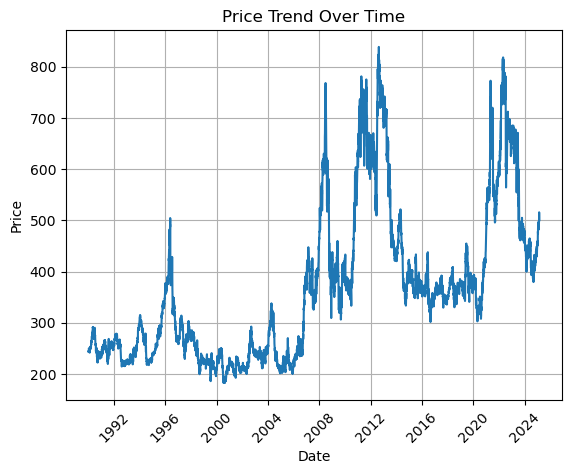

In [56]:
plt.Figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], linestyle='-')

# Formatting
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend Over Time')
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

plt.show()

In [57]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Price'])

print('ADF Statistic: %f'% adf_test[0])
print('p-value: %f'% adf_test[1])

ADF Statistic: -2.380614
p-value: 0.147283


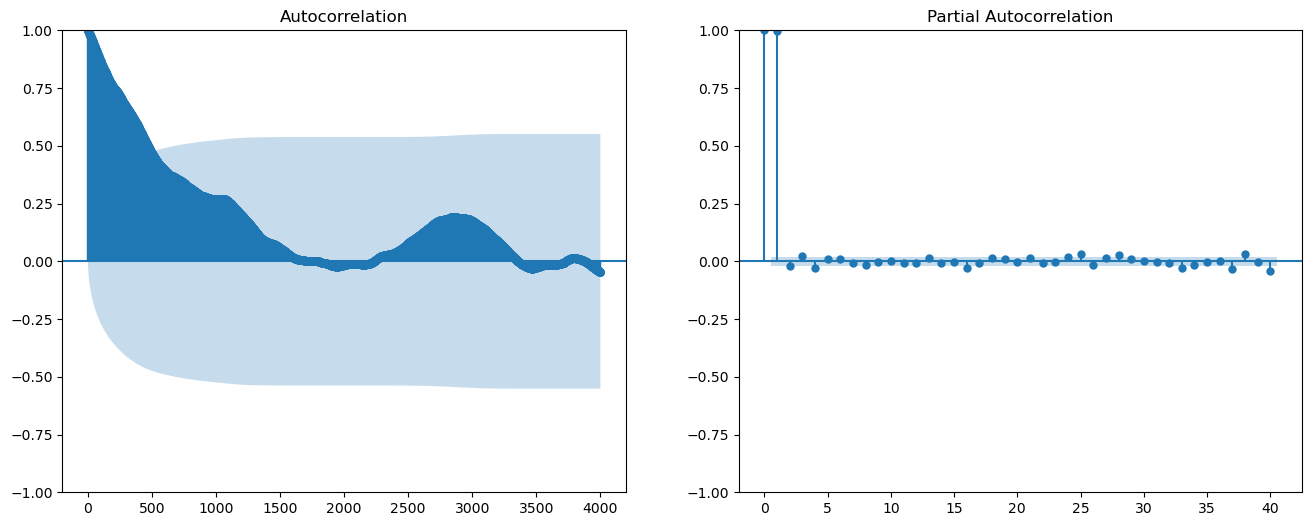

In [58]:
#Seasonality

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df['Price'], lags=4000, alpha=0.05, ax=axes[0])
plot_pacf(df['Price'], lags=40, alpha=0.05, ax=axes[1], method='ywm')

plt.tight_layout
plt.show()


(7339,)
(1835,)


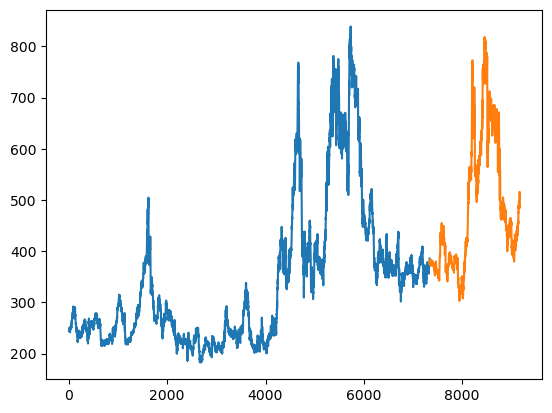

In [129]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df['Price'], test_size=0.2, shuffle=False)

print(train.shape)
print(test.shape)

plt.plot(train)
plt.plot(test)

In [130]:
from pmdarima.arima import auto_arima
model = auto_arima(train, seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=48588.064, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48602.032, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48593.740, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=48592.981, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48600.094, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=48585.734, Time=2.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=48586.329, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=48584.074, Time=1.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=48585.729, Time=2.93 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=48587.141, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=48582.133, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=48591.038, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=48591.798, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=48583.789, Time=1.52 sec
 ARIMA(1,1,2)(0,0,0

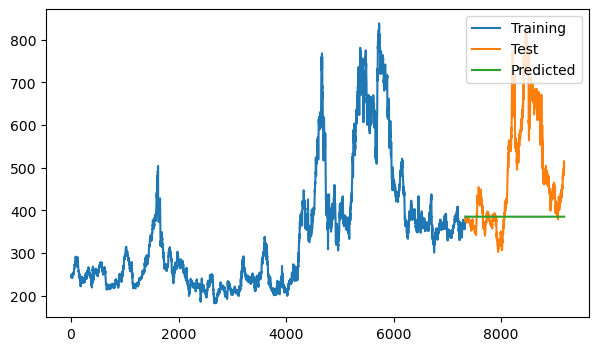

In [131]:
prediction = pd.DataFrame(model.predict(n_periods=1835))
prediction.columns = ['predicted_value']


plt.figure(figsize=(7,4))
plt.plot(train, label="Training")
plt.plot(test, label="Test")
plt.plot(prediction, label="Predicted")
plt.legend(loc='upper right')
plt.show()

Rolling Fit Approach (1-day)

In [152]:
from statsmodels.tsa.arima.model import ARIMA

def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = df['Price']
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]
test = test.to_frame()
test.reset_index(inplace=True, drop=True)
#print(test.index)
#print(test.iloc[0])

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(50):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Update training set +1 value
    obs = test.iloc[t]['Price']
    history.append(obs)
    print('At', t, 'test')

At 0 test
At 1 test
At 2 test
At 3 test
At 4 test
At 5 test
At 6 test
At 7 test
At 8 test
At 9 test
At 10 test
At 11 test
At 12 test
At 13 test
At 14 test
At 15 test
At 16 test
At 17 test
At 18 test
At 19 test
At 20 test
At 21 test
At 22 test
At 23 test
At 24 test
At 25 test
At 26 test
At 27 test
At 28 test
At 29 test
At 30 test
At 31 test
At 32 test
At 33 test
At 34 test
At 35 test
At 36 test
At 37 test
At 38 test
At 39 test
At 40 test
At 41 test
At 42 test
At 43 test
At 44 test
At 45 test
At 46 test
At 47 test
At 48 test
At 49 test


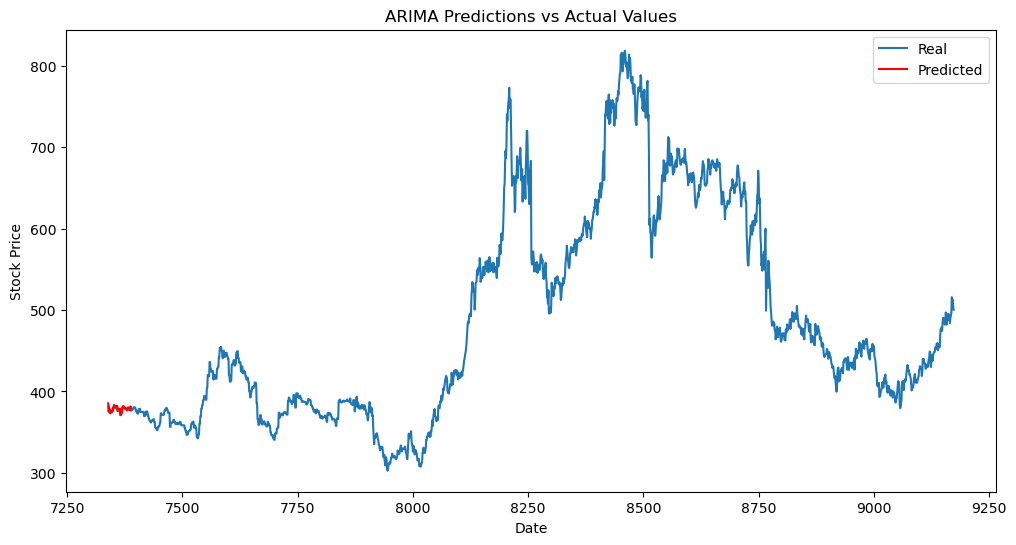

In [153]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df.iloc[size:,:].index, test, label='Real')
plt.plot(df.iloc[size:size+50,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [103]:
print(test.head(10))
print(predictions[:10])

    Price
0  381.75
1  375.25
2  378.50
3  377.75
4  373.25
5  374.50
6  375.50
7  375.00
8  375.75
9  375.75
[385.3888424662688, 381.6737310757563, 375.03579816037325, 378.7837006506216, 377.5204593633095, 373.22582592025316, 374.5682318346402, 375.49325616823097, 374.98414968547354, 375.7919875504006]


Hmmmm bad conditions. This is just one-step ahead predictions at every test instance. Is misleadingly accurate.

 Do more research on valdiation in financial predictions. 

- Mutli-step-ahead forecasts
- Backtesting (essentially what I did before with 80/20 split)
- Look at other financial prediction models that are typical for forecasts (LSTM, Prophet)


Try validating with multi-step-ahead walk forward forecasting.
The way I understand it, it is better than AIC because AIC focuses on one-step ahead predictions, not multi-step. 

So I should define multi-step (2 weeks), then test with multiple ARIMA configurations (loop?)
    Feels computationally expensive, pre filter models based on EDA

Intuitively, I think ARIMA won't work that well with this kind of data as there is no underlying trend that I know of. Maybe if we can get some exogenous data, somekind of semi-precise predictions can be made.

Rolling Fit Approach (1-week)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

train, test = train_test_split(df['Price'], test_size=0.2, shuffle=False)

def arima_forecast(history, horizon):
    # Fit the model
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    # Make the prediction
    forecast = model_fit.forecast(steps=horizon)
    yhat = forecast[0]
    return yhat


# Walk-forward validation
history = [x for x in train]
horizon=7
predictions = list()
for t in range(50):
    # Generate a prediction
    yhat = arima_forecast(history,horizon)
    predictions.append(yhat)
    # Update training set +1 value
    obs = test.iloc[t]
    history.append(obs)
    print('At', t, 'test')

At 0 test
At 1 test
At 2 test
At 3 test
At 4 test
At 5 test
At 6 test
At 7 test
At 8 test
At 9 test
At 10 test
At 11 test
At 12 test
At 13 test
At 14 test
At 15 test
At 16 test
At 17 test
At 18 test
At 19 test
At 20 test
At 21 test
At 22 test
At 23 test
At 24 test
At 25 test
At 26 test
At 27 test
At 28 test
At 29 test
At 30 test
At 31 test
At 32 test
At 33 test
At 34 test
At 35 test
At 36 test
At 37 test
At 38 test
At 39 test
At 40 test
At 41 test
At 42 test
At 43 test
At 44 test
At 45 test
At 46 test
At 47 test
At 48 test
At 49 test


In [138]:
# Walk Forward Validation

def wfv(history, horizon, order):
    history = [x for x in train]
    predictions = pd.DataFrame(columns=('test_instance', 'predictions'))

    for t in range(10):
        model = ARIMA(history, order=order)
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=horizon)
        predictions.at[t, 'test_instance'] = t
        predictions.at[t, 'predictions'] = list(forecast)
        print(f'Prediction at n={t}: {forecast}')

        history.append(test.iloc[t])

    return predictions

horizon = input("What horizon should we use?")

predictions = wfv(train, 7, (1,1,1))





Prediction at n=0: [385.38884247 385.46221396 385.41378381 385.44575099 385.42465049
 385.43857824 385.42938498]
Prediction at n=1: [381.67373108 381.72408139 381.69084172 381.71278549 381.69829891
 381.70786249 381.70154892]
Prediction at n=2: [375.03579816 375.17696086 375.08393221 375.1452397  375.10483701
 375.13146308 375.11391604]
Prediction at n=3: [378.78370065 378.59664839 378.7199775  378.63866296 378.69227605
 378.65692735 378.68023379]
Prediction at n=4: [377.52045936 377.67180936 377.57201517 377.6378155  377.59442937
 377.62303647 377.60417408]
Prediction at n=5: [373.22582592 373.24177511 373.23125241 373.23819491 373.23361449
 373.23663649 373.23464269]
Prediction at n=6: [374.56823183 374.52318668 374.5529245  374.53329225 374.54625303
 374.53769661 374.54334537]
Prediction at n=7: [375.49325617 375.49770672 375.4947696  375.49670794 375.49542875
 375.49627294 375.49571582]
Prediction at n=8: [374.98414969 374.99460914 374.98770706 374.99226167 374.98925613
 374.991239

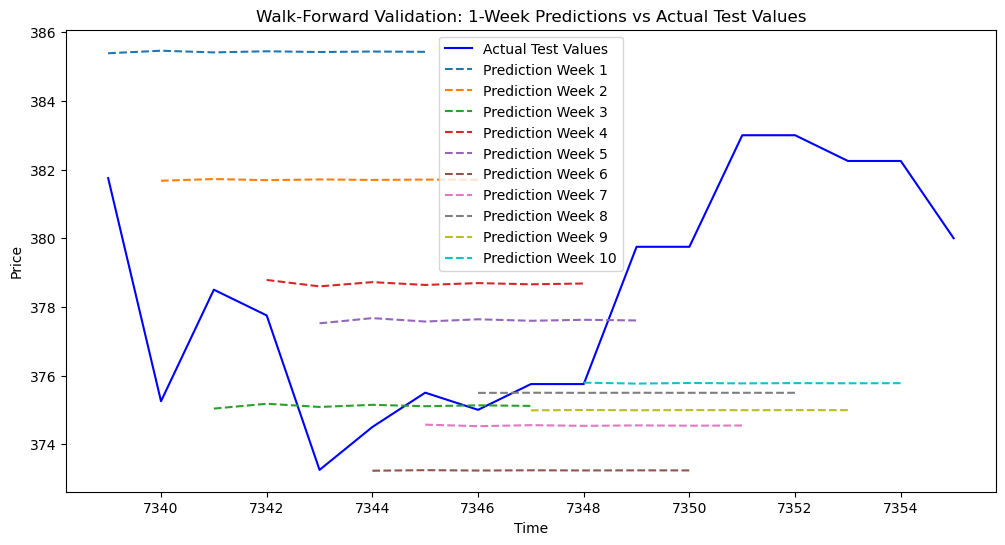

In [150]:
# Plot actual test values
plt.figure(figsize=(12, 6))
plt.plot(test.index[:17], test.values[:17], label='Actual Test Values', color='blue')

# Overlay predictions for each week
for t in range(10):
    forecast = predictions.loc[t, 'predictions']
    forecast_index = test.index[t:t + len(forecast)]  # Create indices for the forecast horizon
    plt.plot(forecast_index, forecast, label=f'Prediction Week {t+1}', linestyle='--')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Walk-Forward Validation: 1-Week Predictions vs Actual Test Values')
plt.legend()
plt.show()

Not great...